# Step 1: Identify Business statement

### DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

The data contains these features:
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

Holiday Events
- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


#### In this project, we focused to answer the following questions:
   <ins>Analysis Tasks / Basic Statistics tasks</ins>

1. Which store has minimum and maximum sales?
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
3. Which store/s has good quarterly growth rate in Q3’2012
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights

  <ins>Statistical Model</ins>
    

6. Build prediction to forecast demand.

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
Change dates into days by creating new variable.

# Step 2: Data Acquisition


In [1]:
#Importing required libraris for loading the data
import pandas as pd
import numpy as np

In [2]:
#Load Walamart Data Set
df_walmart_data = pd.read_csv("C:\\Users\\grkum\\Downloads\\Retail-Analysis-with-Walmart-Data-main\\Walmart_Store_sales.csv")
#View random features from the loaded data
df_walmart_data.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4777,34,18-03-2011,1014218.80,0,55.58,3.495,128.512193,10.398
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
3506,25,08-07-2011,698529.64,0,71.64,3.711,208.438685,7.274
1895,14,15-10-2010,1932162.63,0,58.61,2.868,182.810620,8.724
2697,19,15-06-2012,1440263.15,0,68.19,3.786,138.129533,8.150


In [3]:
##View the data(observations),shape,info,describe to get more insights on the data.
print ("Shape of the data:", df_walmart_data.shape)
print ("----------------------------\n")
print ("Info. of the data:", df_walmart_data.info())
print ("\n----------------------------\n")
print ("Describe of the data:", df_walmart_data.describe())

Shape of the data: (6435, 8)
----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
Info. of the data: None

----------------------------

Describe of the data:              Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05    

# Step 3: Data Wrangling

In [4]:
# Convert date to datetime format and show dataset information
#Importing required library to perform the operation
from datetime import datetime
print ("Before conversion of the feature Date the datatype is:", df_walmart_data.dtypes)

Before conversion of the feature Date the datatype is: Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [5]:
df_walmart_data["Date"] = pd.to_datetime(df_walmart_data["Date"])
print ("After conversion of the feature Date the datatype is:", df_walmart_data.dtypes)

After conversion of the feature Date the datatype is: Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


In [6]:
# checking for missing values
df_walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#No action needed to clean the data since there is no missing values.

In [8]:
# Splitting Date and create new columns (Day, Month, and Year)
df_walmart_data["Day"] = pd.DatetimeIndex(df_walmart_data["Date"]).day
df_walmart_data["Month"] = pd.DatetimeIndex(df_walmart_data["Date"]).month
df_walmart_data["Year"] = pd.DatetimeIndex(df_walmart_data["Date"]).year
df_walmart_data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


# Step 4: Exploratory Data Analysis / Data Exploration

### Q1: Which store has minimum and maximum sales?

In [29]:
#using pandas math functions
#using idxmin function to find the index of first occurrence of minimum over requested axis
#using iloc function to retun the value of that particular index
min_sales = df_walmart_data["Weekly_Sales"].idxmin()
df_walmart_data.iloc[min_sales,:]
# Single line above function: df_walmart_data.iloc[df_walmart_data["Weekly_Sales"].idxmin(),:]


Store                            33
Date            2010-03-12 00:00:00
Weekly_Sales              209986.25
Holiday_Flag                      0
Temperature                   52.82
Fuel_Price                    3.041
CPI                      126.731333
Unemployment                  9.265
Day                              12
Month                             3
Year                           2010
Name: 4619, dtype: object

In [35]:
#My analysis was wrong since I have to find min sale value for all sales per store

print("Total no of stores:",len(df_walmart_data["Store"].unique()))

Total no of stores: 45


In [46]:
# Sum Weekly_Sales for each store, then sortded by total sales
Total_sales_for_each_store =  df_walmart_data.groupby("Store")["Weekly_Sales"].sum().sort_values()
print("Store with Min sales is:\n", Total_sales_for_each_store.head(1))
print("\n\nStore with Max sales is:\n", Total_sales_for_each_store.tail(1))
Total_sales_for_each_store_array = np.array(Total_sales_for_each_store) # convert to array


Store with Min sales is:
 Store
33    37160221.96
Name: Weekly_Sales, dtype: float64


Store with Max sales is:
 Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


In [11]:
#using mathplot lib to visualize data
# importing required libraries
import matplotlib.pyplot as plt

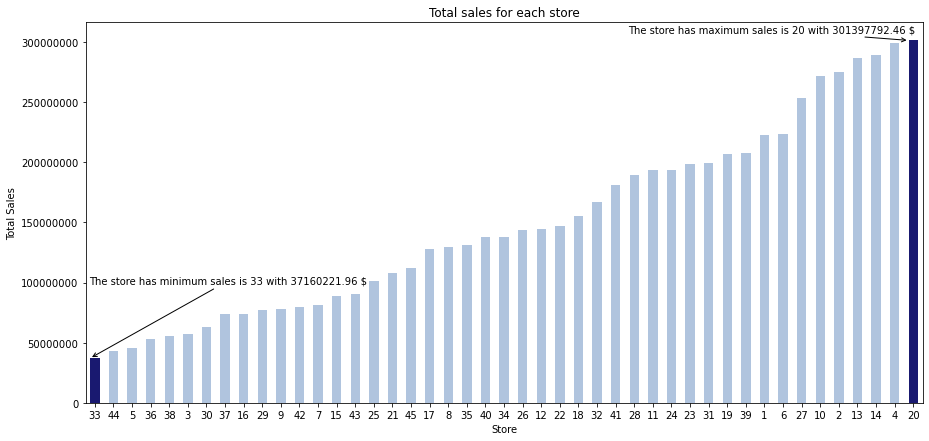

In [69]:
plt.figure(figsize=(15,7))

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['lightsteelblue' if ((x < max(Total_sales_for_each_store_array)) and (x > min(Total_sales_for_each_store_array))) 
                         else 'midnightblue' 
        for x in Total_sales_for_each_store_array]

ax = Total_sales_for_each_store.plot(kind='bar',color=clrs);


#store have minimum sales
p = ax.patches[0]
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords="data",
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
             horizontalalignment='center', verticalalignment='center')

# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');


     
### Q2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?


In [83]:
# Which store has maximum standard deviation
df_walmart_data_std = pd.DataFrame(df_walmart_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(df_walmart_data_std.head(1).index[0])+" with {0:.0f} $".format(df_walmart_data_std.head(1).Weekly_Sales[df_walmart_data_std.head(1).index[0]]))

The store has maximum standard deviation is 14 with 317570 $


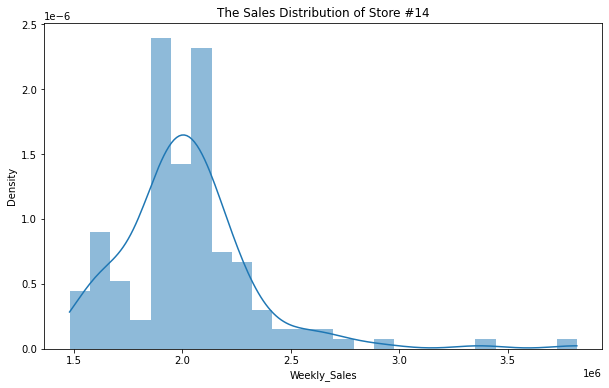

In [103]:
# Distribution of store has maximum standard deviation
#Importing SNS library
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df_walmart_data[df_walmart_data['Store'] == df_walmart_data_std.head(1).index[0]]['Weekly_Sales'],label="[df_walmart_data['Store']",kde=True, stat="density", linewidth=0)
plt.title('The Sales Distribution of Store #'+ str(df_walmart_data_std.head(1).index[0]));

In [134]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(df_walmart_data.groupby('Store')['Weekly_Sales'].std() / df_walmart_data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std.head(5)

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668


### Covariance Values(CV)
- CV less than 10 = Very Good
- CV betweem 10 -20 = Good
- CV between 20 - 30 = Acceptable
- CV greater than 30 = Not Acceptable

In [141]:
#To better understand Multiply the values * 100
coef_mean_std1 = coef_mean_std * 100
conditions = [coef_mean_std1['Coefficient of mean to standard deviation'] <= 10.0,
             (10.0 < coef_mean_std1['Coefficient of mean to standard deviation'] ) & (coef_mean_std1['Coefficient of mean to standard deviation'] <= 20.0),
             (20.0 < coef_mean_std1['Coefficient of mean to standard deviation'] ) & (coef_mean_std1['Coefficient of mean to standard deviation'] <= 30.0),
             ( coef_mean_std1['Coefficient of mean to standard deviation'] > 30.0)
             ]
choices = ["Very Good","Good","Acceptable","Not Acceptable"]
coef_mean_std1["CV-Result"] = np.select(conditions,choices)
coef_mean_std1["CV-Result"].value_counts()

Good          37
Very Good      7
Acceptable     1
Name: CV-Result, dtype: int64

In [154]:
coef_mean_std1.loc[coef_mean_std1["CV-Result"] == 'Acceptable']

,Coefficient of mean to standard deviation,CV-Result
Store,,
35,22.968111,Acceptable


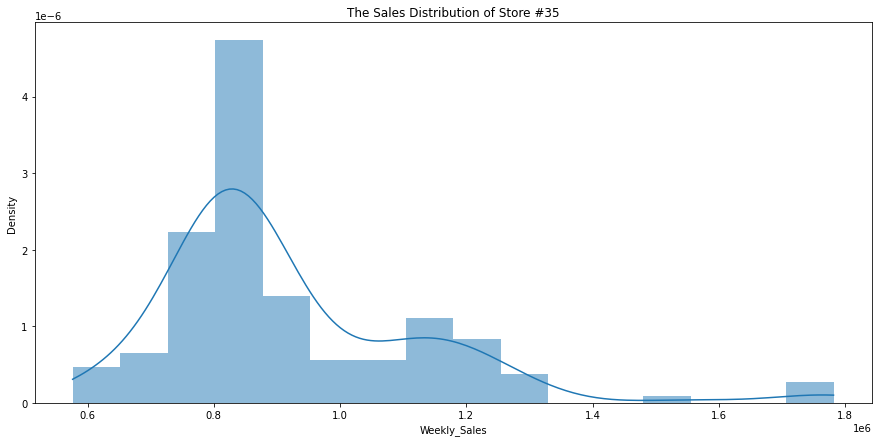

In [131]:
# Distribution of store 35 has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.histplot(df_walmart_data[df_walmart_data['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'],kde=True, stat="density", linewidth=0)
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

### Q3: Which store/s has good quarterly growth rate in Q3’2012

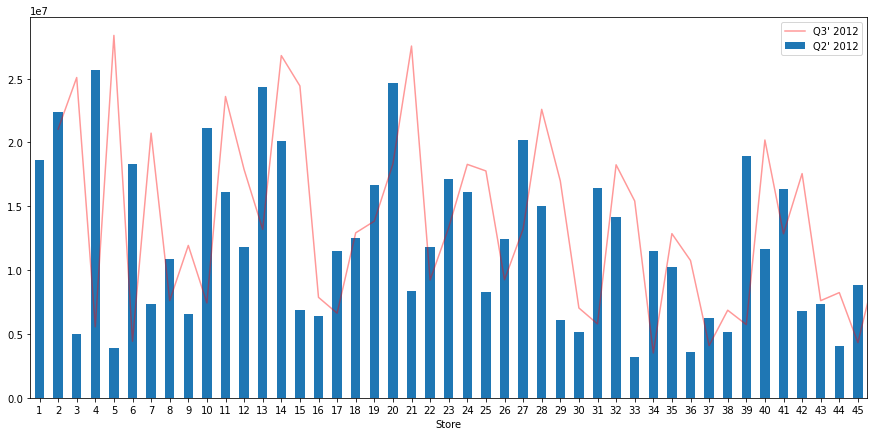

In [125]:
#Importing Dates library from matplotlib
from matplotlib import dates

plt.figure(figsize=(15,7))
# Sales for third quarterly in 2012
Q3 = df_walmart_data[(df_walmart_data['Date'] > '2012-07-01') & (df_walmart_data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = df_walmart_data[(df_walmart_data['Date'] > '2012-04-01') & (df_walmart_data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()


# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),color='r',alpha=0.4,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);


In [155]:
#  store/s has good quarterly growth rate in Q3’2012 - .sort_values(by='Weekly_Sales')
print('Store have good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store have good quarterly growth rate in Q3’2012 is Store 4 With 25652119.35 $


### Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


**Holiday Events:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [163]:
# Stores Holiday Sales
stores_holiday_sales = df_walmart_data[df_walmart_data['Holiday_Flag'] == 1]

# Stores Weekday Sales
stores_nonholiday_sales = df_walmart_data[df_walmart_data['Holiday_Flag'] == 0]

#Stores Sales in Super Bowl Day 
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
stores_holiday_sales_superBowl = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-02-2010')) |
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-02-2011'))|
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-02-2012'))|
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('08-02-2013'))]

#Stores Sales in Labour Day 
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
stores_holiday_sales_labourDay = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-09-2010')) |
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('09-09-2011'))|
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('07-09-2012'))|
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('06-09-2013'))]

#Stores Sales in Thanks Giving 
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
stores_holiday_sales_thanksgiving = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('26-11-2010')) |
                                                         (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('25-11-2011'))|
                                                         (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('23-11-2012'))|
                                                         (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('29-11-2013'))]

#Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

stores_holiday_sales_Christmas = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('31-12-2010')) |
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('30-12-2011'))|
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('28-12-2012'))|
                                                      (pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('27-12-2013'))]

stores_nonholiday_sales_mean = stores_nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()
stores_holiday_sales_sum = stores_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

for row in stores_holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :-{}".format(row.Date,row.Weekly_Sales))
            break;

print("Super Bowl Day Sale",stores_holiday_sales_superBowl['Weekly_Sales'].sum())
print("Labour Day Sale",stores_holiday_sales_labourDay['Weekly_Sales'].sum())
print("Thanksgiving Day Sale",stores_holiday_sales_thanksgiving['Weekly_Sales'].sum())
print("Christmas Day Sale",stores_holiday_sales_Christmas['Weekly_Sales'].sum())


On this Date 2010-10-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-45634397.839999996
On this Date 2010-11-26 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-65821003.24
On this Date 2010-12-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-48336677.63
On this Date 2010-12-31 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-40432519.0
On this Date 2011-09-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-46763227.53
On this Date 2011-11-02 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-47336192.79
On this Date 2011-11-25 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-66593605.26
On this Date 2011-12-30 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-46042461.04
On this Date 2012-07-09 00:00:00 Holiday Sales is greater than Non Holiday Sales and the Sales :-48330059.31
On this Date 

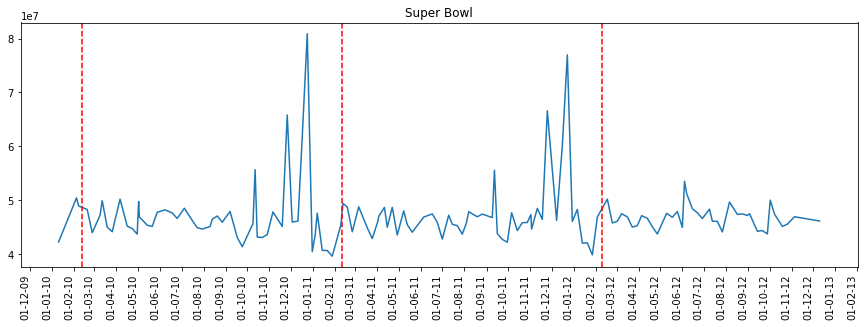

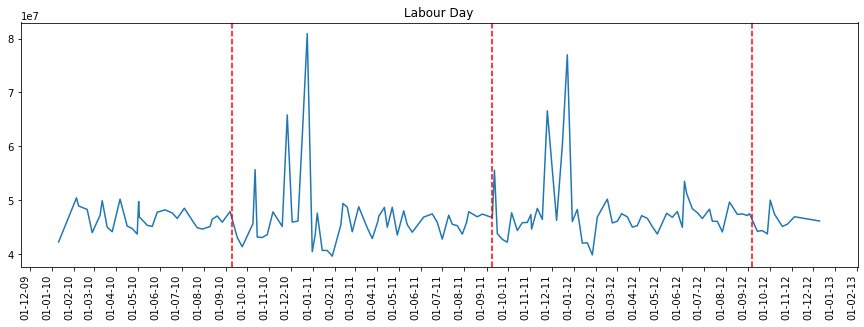

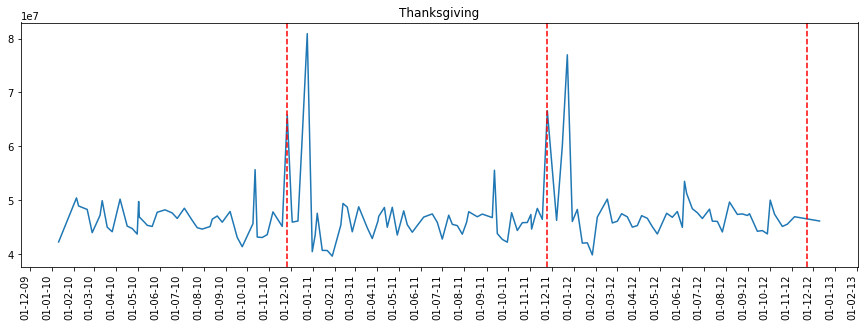

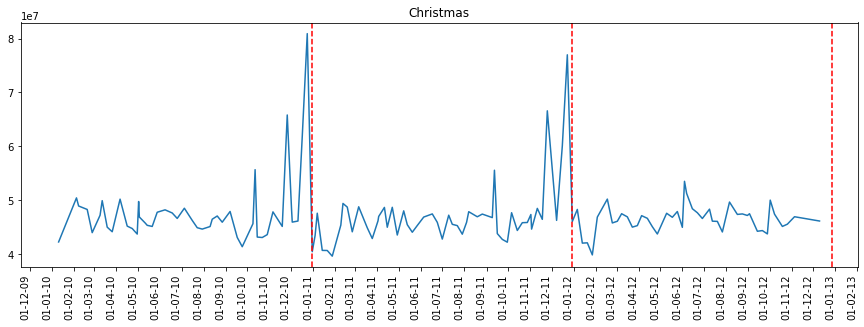

In [126]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = df_walmart_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

#### The sales increased during thanksgiving. And the sales decreased during christmas.

In [164]:
stores_holiday_sales_superBowl

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,2,11,2011


In [169]:
#Same values can be achieved using isin,loc function
df_walmart_data.loc[df_walmart_data.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,2,11,2011


<AxesSubplot:title={'center':'Yearly Sales in Christmas holiday'}, xlabel='Year'>

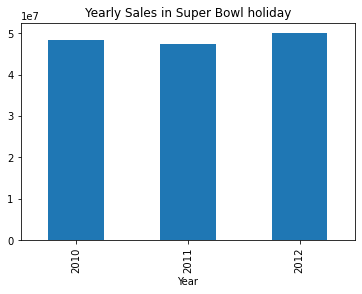

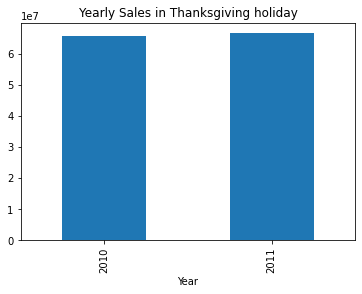

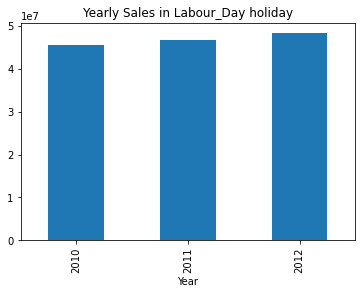

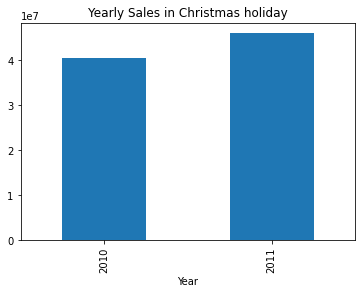

In [172]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(df_walmart_data.loc[df_walmart_data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(df_walmart_data.loc[df_walmart_data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(df_walmart_data.loc[df_walmart_data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(df_walmart_data.loc[df_walmart_data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')


### Q5: Provide a monthly and semester view of sales in units and give insights

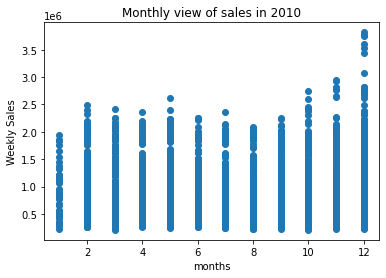

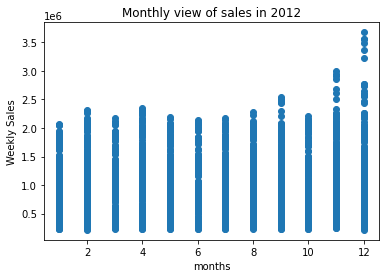

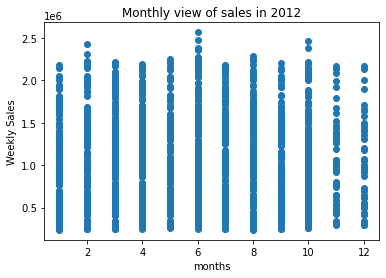

In [174]:
# Monthly view of sales for each years
plt.scatter(df_walmart_data[df_walmart_data.Year==2010]["Month"],df_walmart_data[df_walmart_data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()


plt.scatter(df_walmart_data[df_walmart_data.Year==2011]["Month"],df_walmart_data[df_walmart_data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

plt.scatter(df_walmart_data[df_walmart_data.Year==2012]["Month"],df_walmart_data[df_walmart_data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()


Text(0.5, 1.0, 'Monthly view of sales')

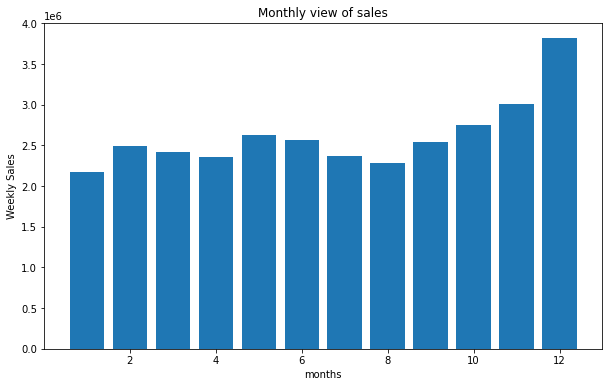

In [177]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(df_walmart_data["Month"],df_walmart_data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

<Figure size 720x432 with 0 Axes>

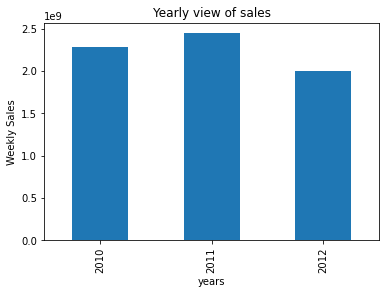

In [178]:
# Yearly view of sales
plt.figure(figsize=(10,6))
df_walmart_data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

### Q6:Build  prediction models to forecast demand (Modeling)

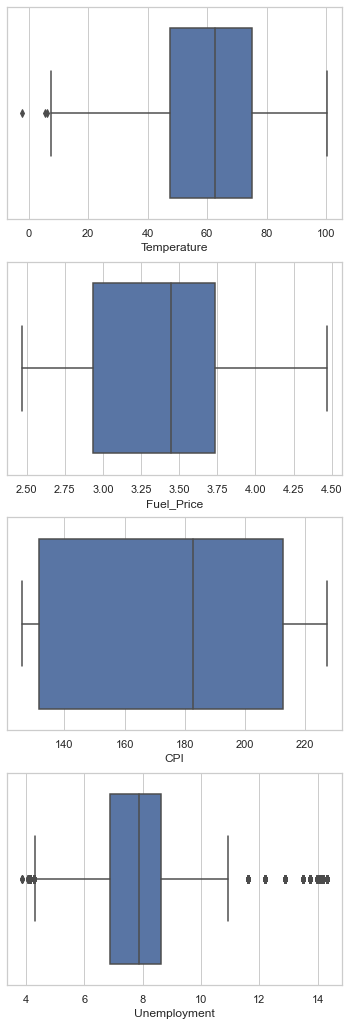

In [218]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = df_walmart_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x=df_walmart_data[column],ax=axs[i]) 


In [227]:
# drop the outliers     
data_new = df_walmart_data[(df_walmart_data["Temperature"]>10) & (df_walmart_data['Unemployment']>4.5) &  (df_walmart_data['Unemployment']<10) ]
data_new


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


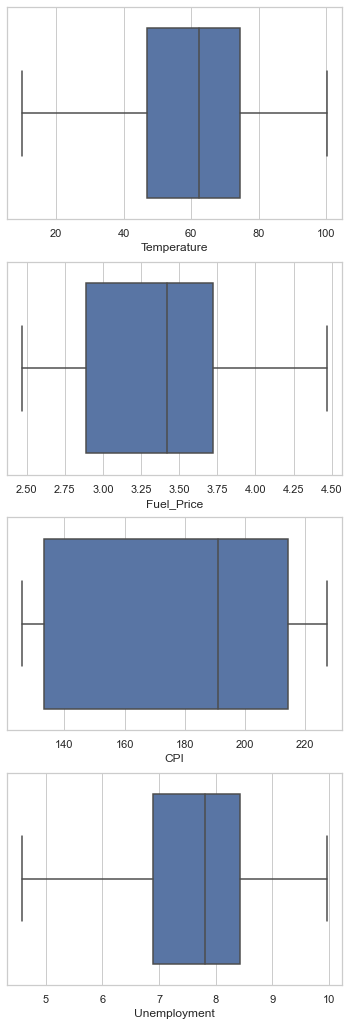

In [228]:
# check outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x=data_new[column], ax=axs[i])

### Build Model

In [230]:
# Import sklearn 
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [231]:
# Select features and target 
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [232]:
#Standardizing train and test data :
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Linear Regression:

Accuracy: 12.512088726918236
Mean Absolute Error:(MAE) 439825.0532406065
Mean Squared Error:(MSE) 285439065768.281
Root Mean Squared Error:(RMSE) 534264.9771118083


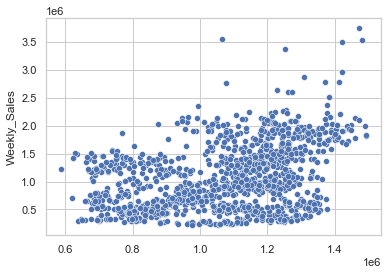

In [235]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:(MAE)', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:(MSE)', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:(RMSE)', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test);

Random Forest Regressor:

Accuracy: 95.55415677783547
Mean Absolute Error: 65768.94418343784
Mean Squared Error: 14822942517.316755
Root Mean Squared Error: 121749.50725697725


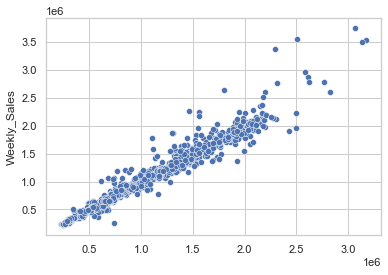

In [236]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test);

DecisionTreeRegressor:

Accuracy: 92.44219380976
Mean Absolute Error: 83224.85054770317
Mean Squared Error: 25198577888.76443
Root Mean Squared Error: 158740.5993713153


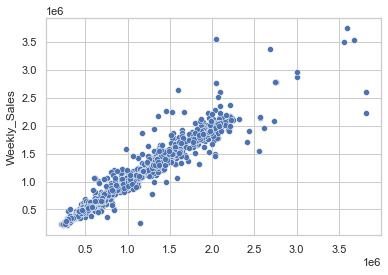

In [237]:
# DecisionTreeRegressor
print('DecisionTreeRegressor:')
print()
dtr = DecisionTreeRegressor(random_state=0)       
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
print('Accuracy:',dtr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(x=y_pred, y=y_test);


ExtraTreesRegressor:

Accuracy: 94.53789276194917
Mean Absolute Error: 66203.30207177659
Mean Squared Error: 18211281317.659355
Root Mean Squared Error: 134949.18050013995


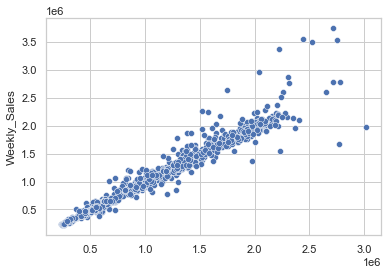

In [242]:
# ExtraTreesRegressor
print('ExtraTreesRegressor:')
print()
etr = ExtraTreesRegressor(n_estimators = 400,max_depth=15,n_jobs=5)       
etr.fit(X_train,y_train)
etr_pred=etr.predict(X_test)
print('Accuracy:',etr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, etr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, etr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, etr_pred)))

sns.scatterplot(x=y_pred, y=y_test);

# All model Comparison :

### Getting averages of best models
The trick is to get the average of the top n best models. The n top models are decided by their accuracy and rmse. Here we have taken 4 models as their accuracies are more than 94%. The models are RandomForestRegressor and ExtraTreesRegressor.

Note that just taking top models doesn’t mean they are not overfitting. This can be verified by checking RMSE or MAE. In the case of a classification problem, we can use the confusion matrix. Also, there should not be much difference in test accuracy and train accuracy.

In [244]:
#Getting averages of models :
final = ( y_pred + etr_pred)/2.0
final


array([ 333436.22573411,  545362.3393987 ,  350755.04945753, ...,
        957352.08854781, 1420200.25174543, 1942856.48960367])

Mean Absolute Error: 66097.75472795531
Mean Squared Error: 17932810290.744617
Root Mean Squared Error: 133913.4432786515


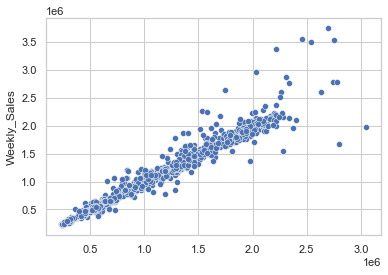

In [245]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, final))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, final))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, final)))

sns.scatterplot(x=final, y=y_test);